## 04 - Using Pandas with tabular data

http://mperignon.github.io/2016-02-04-flagstaff/lessons/python/04-pandas.html

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('streamgage.csv')

In [ ]:
data.head()

In [ ]:
new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Q_cfs', 'Q_status', 'Stage_ft', 'Stage_status']

In [ ]:
data.columns = new_column_names

In [ ]:
data.head()

In [ ]:
data['Stage_m'] = data['Stage_ft'] * 0.3048

In [ ]:
data.head()

In [ ]:
new_station_name = "0" + str(data['Station'].unique()[0])

print new_station_name

In [ ]:
data['Station'] = new_station_name

In [ ]:
data.dtypes

In [ ]:
data['DateTime'] = pd.to_datetime(data['OldDateTime'])

In [ ]:
data.head()

In [ ]:
clean_data = data[['Station','DateTime','Q_cfs','Stage_ft']]
clean_data.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(data['DateTime'],data['Q_cfs'])

In [ ]:
data.plot(x='DateTime', y='Q_cfs', title = 'Station ' + new_station_name)
plt.ylabel('Discharge')

In [ ]:
import pandas as pd

data = pd.read_csv('streamgage.csv')

new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Q_cfs', 'Q_status', 'Stage_ft', 'Stage_status']
data.columns = new_column_names

new_station_name = "0" + str(data['Station'].unique()[0])
data['Station'] = new_station_name

data['DateTime'] = pd.to_datetime(data['OldDateTime'])

data.plot(x='DateTime', y='Q_cfs', title = 'Station ' + new_station_name)
plt.ylabel('Discharge')
plt.savefig('discharge_' + new_station_name + '.png')

## 05 - Automating with web services

http://mperignon.github.io/2016-02-04-flagstaff/lessons/python/05-WebServices.html

In [ ]:
url = "http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=2016-01-01&endDT=2016-01-10&parameterCd=00060,00065"

In [ ]:
data = pd.read_csv(url, comment='#', sep='\t', header=1)

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
import pandas as pd

url = "http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=2016-01-01&endDT=2016-01-10&parameterCd=00060,00065"
data = pd.read_csv(url, comment='#', sep='\t', header=1)

new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Q_cfs', 'Q_status', 'Stage_ft', 'Stage_status']
data.columns = new_column_names

new_station_name = "0" + str(data['Station'].unique()[0])
data['Station'] = new_station_name

data['DateTime'] = pd.to_datetime(data['OldDateTime'])

data.plot(x='DateTime', y='Q_cfs', title = 'Station ' + new_station_name)
plt.ylabel('Discharge')
plt.savefig('discharge_' + new_station_name + '.png')

In [ ]:
station_name = '09380000'

url1 = 'http://waterservices.usgs.gov/nwis/iv/?'

url2 = 'format=rdb'

url3 = 'sites=' + station_name

url4 = 'startDT=2016-01-01'

url5 = 'endDT=2016-01-10'

url6 = 'parameterCd=00060,00065'

url = url1 + url2 + '&' + url3 + '&' + url4 + '&' + url5 + '&' + url6

print url

## 06 - Creating functions

http://mperignon.github.io/2016-02-04-flagstaff/lessons/python/06-functions.html

In [1]:
def generate_url(name_of_station):
    
    url1 = 'http://waterservices.usgs.gov/nwis/iv/?'
    url2 = 'format=rdb'
    url3 = 'sites=' + name_of_station
    url4 = 'startDT=2016-01-01'
    url5 = 'endDT=2016-01-10'
    url6 = 'parameterCd=00060,00065'

    url = url1 + url2 + '&' + url3 + '&' + url4 + '&' + url5 + '&' + url6
    
    return url

In [ ]:
my_url = generate_url('09380000')

print my_url

In [2]:
def import_data(url):
    
    data = pd.read_csv(url, comment='#', sep='\t', header=1)

    new_column_names = ['Agency', 'Station', 'OldDateTime', 'Timezone', 'Q_cfs', 'Q_status', 'Stage_ft', 'Stage_status']
    data.columns = new_column_names

    new_station_name = "0" + str(data['Station'].unique()[0])
    data['Station'] = new_station_name

    data['DateTime'] = pd.to_datetime(data['OldDateTime'])
    
    return data

In [3]:
def make_plots(dataFrame):
    
    new_station_name = "0" + str(dataFrame['Station'].unique()[0])
    
    dataFrame.plot(x='DateTime', y='Q_cfs')
    plt.ylabel('Discharge')
    plt.savefig('discharge_' + new_station_name + '.png')

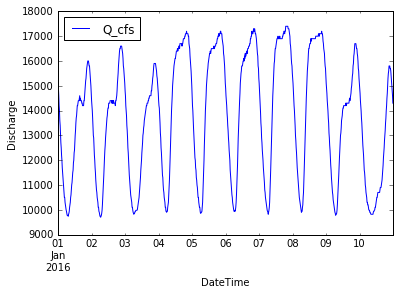

In [4]:
#############

station_name = '09380000'

#############

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

my_url = generate_url(station_name)

data = import_data(my_url)

make_plots(data)

## Further lessons:

http://mperignon.github.io/2016-02-04-flagstaff/lessons/python/